# Exploratory Data Analysis: Retail

This is the superstore data for US based company.

**Import libraries**

In [31]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**

In [33]:
df=pd.read_csv('SampleSuperstore.csv')

In [34]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Let's check unique elements in different columns.

In [36]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [37]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [38]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [39]:
df[df['Category']=='Furniture']['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [40]:
df[df['Category']=='Office Supplies']['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [41]:
df[df['Category']=='Technology']['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

This code aligns the markdown table to left.

In [12]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>



The products that are selling in this site are:

| Office Supplies | Technology | Furniture
|:-: |:-: | :-:|
| Lables | Phones| Bookcases
 | Storage| Accessories| Chairs
 | Art | Machines| Tables
 | Binders | Copiers|Furnishings
| Appliances| | 
| Paper| |
|Envelopes| |
| Fasteners| |
| Supplies| |

Now, we will make different dataframe for Profit and Loss.

In [42]:
Profit=df[df['Profit']>0]

In [43]:
Loss=df[df['Profit']<0]

In [44]:
Loss.rename(columns={'Profit':'Loss'},inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We will group the Profit and Loss dataframe by category.

In [17]:
category_profit=Profit.groupby('Category').sum().drop('Postal Code',axis=1).reset_index()

In [22]:
category_loss=Loss.groupby('Category').sum().drop('Postal Code',axis=1).reset_index()

In [46]:
category_profit

,Category,Sales,Quantity,Discount,Profit
0,Furniture,465116.9615,5251,98.85,79387.3818
1,Office Supplies,618988.7490,19370,400.40,179106.0593
2,Technology,716701.1480,5957,153.80,184034.8663


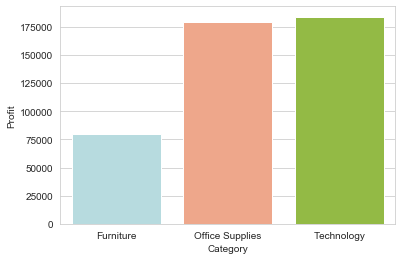

In [19]:
sns.set_style('whitegrid')
sns.barplot(x='Category',y='Profit',data=category_profit,palette=['powderblue','lightsalmon','yellowgreen'])

In [48]:
category_loss

,Category,Sales,Quantity,Discount,Loss
0,Furniture,257885.5868,2652,262.14,-60936.1090
1,Office Supplies,91608.6750,3425,547.20,-56615.2585
2,Technology,119212.8930,963,90.40,-38579.9182


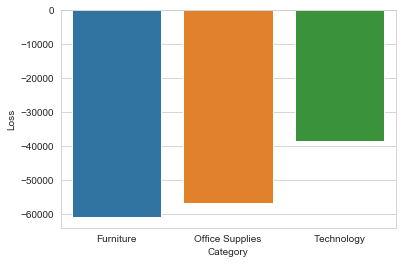

In [24]:
sns.barplot(x='Category',y='Loss',data=category_loss)

Let's merge these two bar graphs into single bar garph which will be easy to compare.

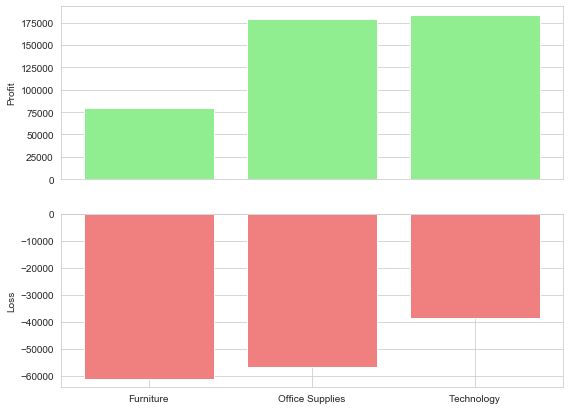

In [49]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
rects1=plt.bar(x='Category',height='Profit',data=category_profit,color='lightgreen')
plt.ylabel('Profit')
plt.xticks([],[])

plt.subplot(2,1,2)
rects2=plt.bar(x='Category',height='Loss',data=category_loss,color='lightcoral')
plt.ylabel('Loss')
plt.xticks(range(3),category_loss['Category'])
#plt.show()

plt.show()

As we can see from the above graphs, Technology has highest profit and lowest loss. On contrary, Furniture section has minimum profit and maximum loss.

Let's move ahead to see the overall gain from these categories.

In [52]:
overall_category=pd.merge(category_profit,category_loss,on='Category')

In [53]:
overall_category

,Category,Sales_x,Quantity_x,Discount_x,Profit,Sales_y,Quantity_y,Discount_y,Loss
0,Furniture,465116.9615,5251,98.85,79387.3818,257885.5868,2652,262.14,-60936.1090
1,Office Supplies,618988.7490,19370,400.40,179106.0593,91608.6750,3425,547.20,-56615.2585
2,Technology,716701.1480,5957,153.80,184034.8663,119212.8930,963,90.40,-38579.9182


In [54]:
overall_category['Overall Gain']=overall_category['Profit']+overall_category['Loss']

In [55]:
overall_category

,Category,Sales_x,Quantity_x,Discount_x,Profit,Sales_y,Quantity_y,Discount_y,Loss,Overall Gain
0,Furniture,465116.9615,5251,98.85,79387.3818,257885.5868,2652,262.14,-60936.1090,18451.2728
1,Office Supplies,618988.7490,19370,400.40,179106.0593,91608.6750,3425,547.20,-56615.2585,122490.8008
2,Technology,716701.1480,5957,153.80,184034.8663,119212.8930,963,90.40,-38579.9182,145454.9481


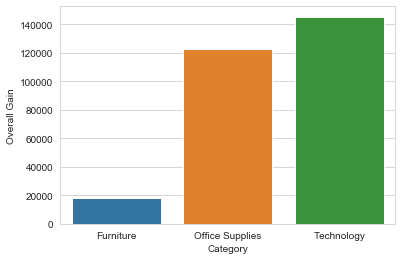

In [56]:
sns.barplot(x='Category',y='Overall Gain',data=overall_category)

From the above graph, we can conclude that maximum benefit are gained from Technology and minimum benefit from Furniture. So we need to examine the Furniture section more closely to see which sub-category caused the maximum loss. 

Let's examine the Furniture category in detail.

In [61]:
Furniture=df[df['Category']=='Furniture']

In [62]:
#We will make different dataframe for Profit and Loss in Furniture category.
Furniture_profit=Furniture[Furniture['Profit']>0]
Furniture_loss=Furniture[Furniture['Profit']<0]
Furniture_loss.rename(columns={'Profit':'Loss'},inplace=True)

In [65]:
#We will group by sub-category for profit and loss of Furniture dataframe to examine the Furniture in more detail.
Furniture_profit=Furniture_profit.groupby('Sub-Category').sum().drop('Postal Code',axis=1).reset_index()
Furniture_loss=Furniture_loss.groupby('Sub-Category').sum().drop('Postal Code',axis=1).reset_index()

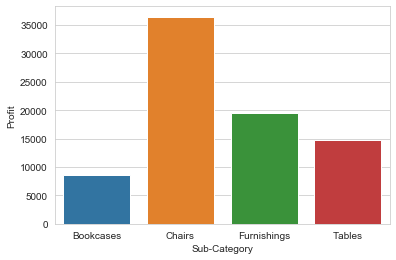

In [66]:
sns.barplot(x='Sub-Category',y='Profit',data=Furniture_profit)

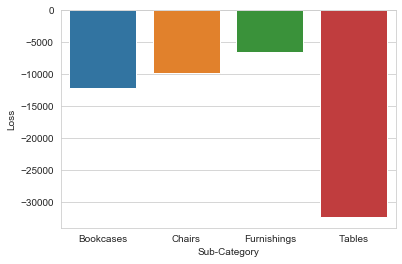

In [67]:
sns.barplot(x='Sub-Category',y='Loss',data=Furniture_loss)

Let's see the overall gain in Furniture category.

In [68]:
overall_furniture=pd.merge(Furniture_profit,Furniture_loss,on='Sub-Category')
overall_furniture['Overall Gain']=overall_furniture['Profit']+overall_furniture['Loss']

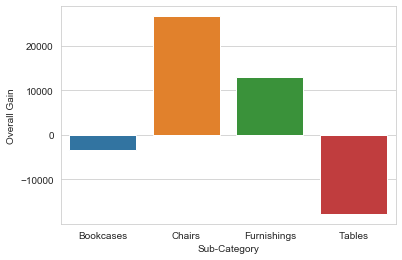

In [69]:
sns.barplot(x='Sub-Category',y='Overall Gain',data=overall_furniture)

So, we can see bookcases and tables section of Furniture category are causing more loss than profit. Thus, this area need more attention to achieve maximum profit from Furniture section. 

# Sales and Profit by Ship Mode

Here, we will examine through which Ship Mode this Retail company is getting maximum profit.

We will make different dataframe for Profit and Loss of Ship Mode, merge them together and visualize it graphically.

In [70]:
ShipMode_profit=Profit.groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
ShipMode_loss=Loss.groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
ShipMode_loss.rename(columns={'Profit':'Loss'},inplace=True)

In [71]:
#Merging profit and loss dataframe of Ship Mode
ShipMode=pd.merge(ShipMode_profit,ShipMode_loss,on='Ship Mode').drop(['Sales_x','Sales_y','Quantity_x','Quantity_y','Discount_x','Discount_y'],axis=1)

In [72]:
ShipMode

,Ship Mode,Profit,Loss
0,First Class,71630.1108,-22660.2709
1,Same Day,24789.8643,-8898.1054
2,Second Class,81671.0083,-24224.3729
3,Standard Class,264437.3240,-100348.5365


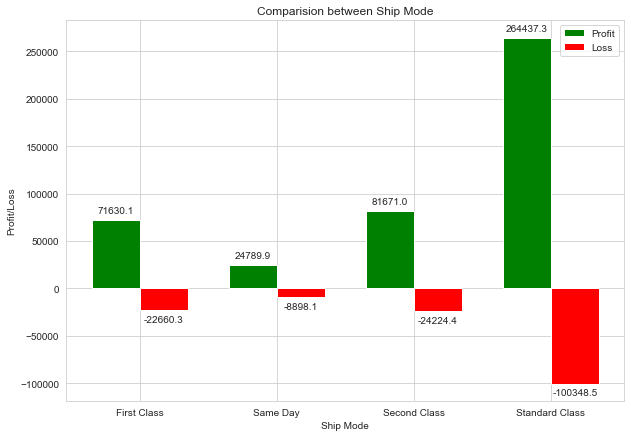

In [73]:
plt.figure(figsize=(10,7))
width = 0.35 
rects1 = plt.bar(ShipMode['Ship Mode'], ShipMode['Profit'], -width, align='edge', color='g', label='Profit')
rects2 = plt.bar(ShipMode['Ship Mode'], ShipMode['Loss'], +width, align='edge', color='r', label='Loss')


plt.xlabel('Ship Mode')
plt.ylabel('Profit/Loss')
plt.title('Comparision between Ship Mode')
plt.legend()

def autolabel(rects,spacing=5):
    """Add labels to the end of each bar in a bar chart."""
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically
            va="top"
        label = "{:.1f}".format(y_value)
        
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
autolabel(rects1)
autolabel(rects2)

plt.show()

## Overall Gain in Ship Mode

In [74]:
ShipMode['Overall Gain']=ShipMode['Profit']+ShipMode['Loss']

In [75]:
ShipMode

,Ship Mode,Profit,Loss,Overall Gain
0,First Class,71630.1108,-22660.2709,48969.8399
1,Same Day,24789.8643,-8898.1054,15891.7589
2,Second Class,81671.0083,-24224.3729,57446.6354
3,Standard Class,264437.3240,-100348.5365,164088.7875


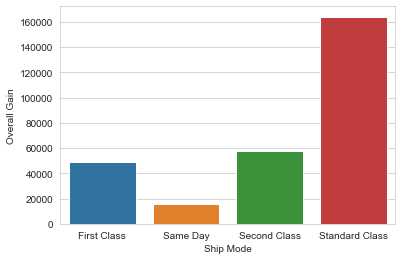

In [76]:
sns.barplot(x='Ship Mode',y='Overall Gain',data=ShipMode)

Maximum profit is gained from the 'Standard Class' and minumum from 'Same Day' ship mode. 

## Category and Ship Mode

Inorder to compare category and ship mode, we need to make different dataframe for profit and loss of different category and group them by ship mode.

In [82]:
Profit_Furniture_shipmode=Profit[Profit['Category']=='Furniture'].groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
Profit_Technology_shipmode=Profit[Profit['Category']=='Technology'].groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
Profit_Officesupplies_shipmode=Profit[Profit['Category']=='Office Supplies'].groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()

In [83]:
Loss_Furniture_shipmode=Loss[Loss['Category']=='Furniture'].groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
Loss_Technology_shipmode=Loss[Loss['Category']=='Technology'].groupby('Ship Mode').sum().drop('Postal Code',axis=1).reset_index()
Loss_Officesupplies_shipmode=Loss[Loss['Category']=='Office Supplies'].groupby('Ship Mode').sum().drop('Postal Code',axis=1 ).reset_index()

Now, let's merge Profit and Loss dataframe for each category.

In [84]:
Furniture_shipmode=pd.merge(Profit_Furniture_shipmode,Loss_Furniture_shipmode,on='Ship Mode').drop(columns=['Sales_x','Sales_y','Quantity_x','Quantity_y','Discount_x','Discount_y'])
Technology_shipmode=pd.merge(Profit_Technology_shipmode,Loss_Technology_shipmode,on='Ship Mode').drop(columns=['Sales_x','Sales_y','Quantity_x','Quantity_y','Discount_x','Discount_y'])
Officesupplies_shipmode=pd.merge(Profit_Officesupplies_shipmode,Loss_Officesupplies_shipmode,on='Ship Mode').drop(columns=['Sales_x','Sales_y','Quantity_x','Quantity_y','Discount_x','Discount_y'])

In [85]:
Furniture_shipmode['Furniture Overall Gain']=Furniture_shipmode['Profit']+Furniture_shipmode['Loss']
Technology_shipmode['Technology Overall Gain']=Technology_shipmode['Profit']+Technology_shipmode['Loss']
Officesupplies_shipmode['Office Supplies Overall Gain']=Officesupplies_shipmode['Profit']+Officesupplies_shipmode['Loss']

In [86]:
Furniture_shipmode

,Ship Mode,Profit,Loss,Furniture Overall Gain
0,First Class,11191.4265,-8124.4791,3066.9474
1,Same Day,3867.1374,-3069.7890,797.3484
2,Second Class,17208.2213,-12981.9599,4226.2614
3,Standard Class,47120.5966,-36759.8810,10360.7156


Again, we will merge all these category dataframe together.

In [87]:
Category_shipmode=pd.merge(Furniture_shipmode.drop(columns=['Profit','Loss'],axis=1),Technology_shipmode.drop(columns=['Profit','Loss']),on='Ship Mode')

In [88]:
Category_shipmode=pd.merge(Category_shipmode,Officesupplies_shipmode.drop(columns=['Profit','Loss'],axis=1))

In [90]:
#Our final dataframe will look like this.
Category_shipmode

,Ship Mode,Furniture Overall Gain,Technology Overall Gain,Office Supplies Overall Gain
0,First Class,3066.9474,27502.5634,18400.3291
1,Same Day,797.3484,8670.8913,6423.5192
2,Second Class,4226.2614,26152.2064,27068.1676
3,Standard Class,10360.7156,83129.2870,70598.7849


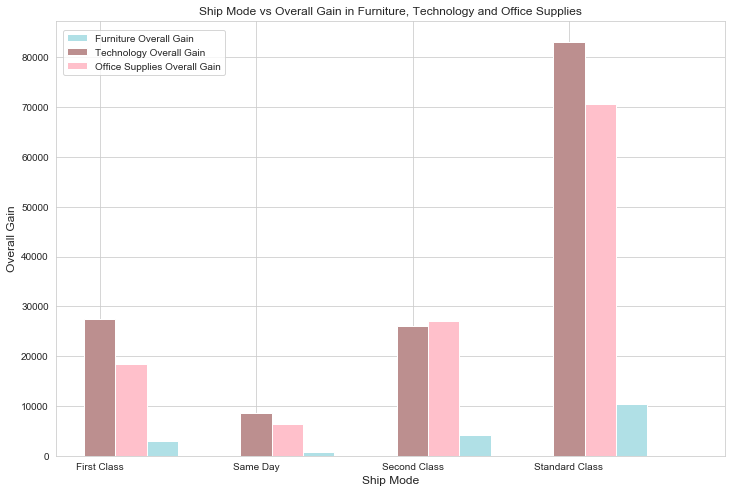

In [92]:
ind = np.arange(5)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1=ax.bar(Category_shipmode['Ship Mode'], Category_shipmode['Furniture Overall Gain'], width*2, align='edge', color='powderblue', label='Furniture')
rects2 =ax.bar(Category_shipmode['Ship Mode'], Category_shipmode['Technology Overall Gain'], -width, align='edge', color='rosybrown', label='Technology')
rects3=ax.bar(Category_shipmode['Ship Mode'], Category_shipmode['Office Supplies Overall Gain'], width, align='edge', color='pink', label='Office Supplies')
xlabels=Category_shipmode.iloc[:,0]
ax.set_xticks(ind-width/2)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("Ship Mode", fontsize=12)
ax.set_ylabel("Overall Gain", fontsize=12)
ax.set_title('Ship Mode vs Overall Gain in Furniture, Technology and Office Supplies')
ax.legend((rects1[0], rects2[0],rects3[0]),('Furniture Overall Gain', 'Technology Overall Gain','Office Supplies Overall Gain'),bbox_to_anchor=(0.26, 0.99))

plt.show()

Here we can observe, in every ship mode, technology has its maximum overall gain except in 'Second Class' ship mode. Furniture has its lowest overall gain in every ship mode.

## Sales in different region

In [94]:
Region=df.groupby('Region').sum().drop('Postal Code',axis=1)

In [95]:
Region

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

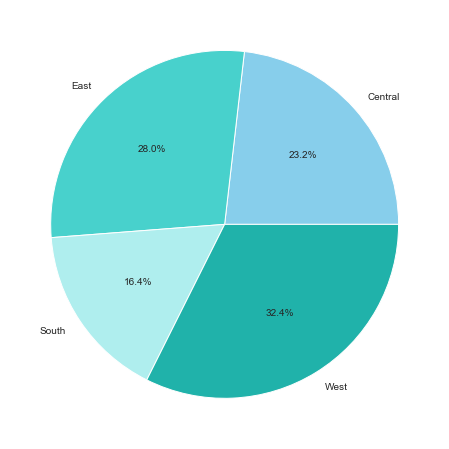

In [96]:
plt.figure(figsize=(10,8))
colors = ["skyblue", "mediumturquoise","paleturquoise","lightseagreen"]
Region['Quantity'].plot.pie(autopct='%1.1f%%',colors=colors)
plt.axes().set_ylabel('')

Maximum sales is in West region and minimum sales is in South region.

## Region wise Category Classification

In [98]:
#As we have already created seperate Furniture dataframe, we do not need to create this time.
Technology=df[df['Category']=='Technology']
Office_Supplies=df[df['Category']=='Office Supplies']

Now, we will group this dataframe by Region and merge them together.

In [100]:
Furniture_Region=Furniture.groupby('Region').sum().drop(['Postal Code','Discount'],axis=1).reset_index()
Technology_Region=Technology.groupby('Region').sum().drop(['Postal Code','Discount'],axis=1).reset_index()
Office_Region=Office_Supplies.groupby('Region').sum().drop(['Postal Code','Discount'],axis=1).reset_index()

In [101]:
#Renaming the columns to avoide the confusion while merging this dataframe.
Furniture_Region.rename(columns={'Quantity':'Quantity (Furniture)','Sales':'Sales (Furniture)','Profit':'Profit (Furniture)'},inplace=True)
Technology_Region.rename(columns={'Quantity':'Quantity (Technology)','Sales':'Sales (Technology)','Profit':'Profit (Technology)'},inplace=True)
Office_Region.rename(columns={'Quantity':'Quantity (Office Supplies)','Sales':'Sales (Office Supplies)','Profit':'Profit (Office Supplies)'},inplace=True)

In [104]:
#Merging above dataframes
Regions=pd.merge(Furniture_Region,Technology_Region,on="Region").merge(Office_Region,on='Region')

In [105]:
Regions

,Region,Sales (Furniture),Quantity (Furniture),Profit (Furniture),Sales (Technology),Quantity (Technology),Profit (Technology),Sales (Office Supplies),Quantity (Office Supplies),Profit (Office Supplies)
0,Central,163797.1638,1827,-2871.0494,170416.312,1544,33697.4320,167026.415,5409,8879.9799
1,East,208291.2040,2214,3046.1658,264973.981,1942,47462.0351,205516.055,6462,41014.5791
2,South,117298.6840,1291,6771.2061,148771.908,1118,19991.8314,125651.313,3800,19986.3928
3,West,252612.7435,2696,11504.9503,251991.832,2335,44303.6496,220853.249,7235,52609.8490


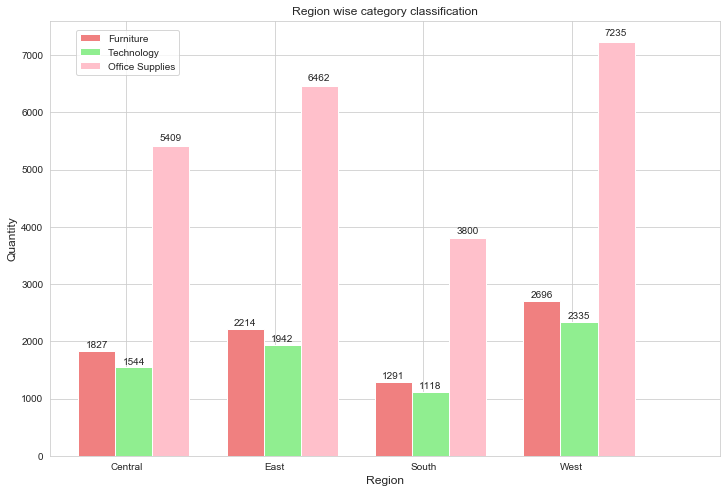

In [116]:
fig, ax = plt.subplots(figsize=(12,8))

# Using numpy to group 3 different data with bars
X = np.arange(4)
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
rects1=plt.bar(X, Regions['Quantity (Furniture)'], color = 'lightcoral', width = 0.25)
rects2=plt.bar(X + 0.25, Regions['Quantity (Technology)'], color = 'lightgreen', width = 0.25)
rects3=plt.bar(X + 0.5, Regions['Quantity (Office Supplies)'], color = 'pink', width = 0.25)

xlabels=Regions.iloc[:,0]
ax.set_xticks(ind+width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Quantity", fontsize=12)
ax.set_title('Region wise category classification')
ax.legend((rects1[0], rects2[0],rects3[0]),('Furniture', 'Technology','Office Supplies'),bbox_to_anchor=(0.20, 0.99))

def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1.01*height,'%d' % int(height),ha='center', va='bottom')
labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.show()

Here, we can see minimum quantity is supplied from Technology category and maximum form Office Supplies. Even though minimum quantity is supplied from technology category, there is maximum profit and minimum loss in this category. 

In conclusion, through Technology category this retail store can achieve maximum benefit in every region but they need to give attention to furniture category as they have maximum loss as compared to others.